In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import io
uploaded = files.upload()

Saving Visakhapatnam_2020.csv to Visakhapatnam_2020.csv


In [3]:
df=pd.read_csv(io.BytesIO(uploaded['Visakhapatnam_2020.csv']))
df.head() #displays first 5 elements

,Station,Timestamp,Radar Sensor (cm),Radar Sensor (m),Unnamed: 4,Unnamed: 5
0,Visakhapatnam,1/1/2020 0:01,27.86,0.2786,0.0,32.5
1,Visakhapatnam,1/1/2020 0:02,27.40,0.2740,0.0,32.4
2,Visakhapatnam,1/1/2020 0:03,25.93,0.2593,0.0,30.9
3,Visakhapatnam,1/1/2020 0:04,25.56,0.2556,0.0,30.5
4,Visakhapatnam,1/1/2020 0:05,26.59,0.2659,0.0,31.2


In [4]:
r_s=df['Radar Sensor (m)']
r_s

0         0.2786
1         0.2740
2         0.2593
3         0.2556
4         0.2659
           ...  
422371    0.5170
422372    0.5248
422373    0.5205
422374    0.5205
422375    0.5404
Name: Radar Sensor (m), Length: 422376, dtype: float64

In [5]:
#for 3 months--91173
date=df.iloc[:108542,1]
date

0           1/1/2020 0:01
1           1/1/2020 0:02
2           1/1/2020 0:03
3           1/1/2020 0:04
4           1/1/2020 0:05
               ...       
108537    3/31/2020 23:54
108538    3/31/2020 23:55
108539    3/31/2020 23:56
108540    3/31/2020 23:58
108541    3/31/2020 23:59
Name: Timestamp, Length: 108542, dtype: object

In [6]:
date1=df.iloc[:108542,3]
date1

0         0.2786
1         0.2740
2         0.2593
3         0.2556
4         0.2659
           ...  
108537    0.3135
108538    0.3001
108539    0.3133
108540    0.3133
108541    0.2925
Name: Radar Sensor (m), Length: 108542, dtype: float64

In [7]:
X_train=r_s[0:108542]
Y_train=r_s[1:108543]
Y_train

1         0.2740
2         0.2593
3         0.2556
4         0.2659
5         0.2642
           ...  
108538    0.3001
108539    0.3133
108540    0.3133
108541    0.2925
108542    0.2961
Name: Radar Sensor (m), Length: 108542, dtype: float64

In [8]:
X_train=np.reshape(np.array(X_train),(108542,1,1))
Y_train=np.reshape(np.array(Y_train),(108543,1,1))

ValueError: ignored

In [9]:
from keras.layers import Dense,LSTM
from keras.models import Sequential

In [10]:
reg=Sequential()
reg.add(LSTM(units=4,activation='relu',input_shape=(None,1)))
reg.add(Dense(units=1))
reg.compile(optimizer='adam',loss='mean_squared_error')
reg.fit(X_train,Y_train,batch_size=10,epochs=25)

Epoch 1/25
10855/10855 [==============================] - 64s 4ms/step - loss: 0.0331
Epoch 2/25
10855/10855 [==============================] - 42s 4ms/step - loss: 1.2358e-04
Epoch 3/25
10855/10855 [==============================] - 44s 4ms/step - loss: 1.2080e-04
Epoch 4/25
10855/10855 [==============================] - 43s 4ms/step - loss: 1.2208e-04
Epoch 5/25
10855/10855 [==============================] - 42s 4ms/step - loss: 1.2127e-04
Epoch 6/25
10855/10855 [==============================] - 44s 4ms/step - loss: 1.1971e-04
Epoch 7/25
10855/10855 [==============================] - 43s 4ms/step - loss: 1.2019e-04
Epoch 8/25
10855/10855 [==============================] - 44s 4ms/step - loss: 1.1825e-04
Epoch 9/25
10855/10855 [==============================] - 41s 4ms/step - loss: 1.2449e-04
Epoch 10/25
10855/10855 [==============================] - 43s 4ms/step - loss: 1.1985e-04
Epoch 11/25
10855/10855 [==============================] - 43s 4ms/step - loss: 1.2194e-04
Epoch 12/25


In [11]:
uploaded1 = files.upload()
dg=pd.read_csv(io.BytesIO(uploaded['Visakhapatnam_2020.csv']))


Saving Visakhapatnam_2020.csv to Visakhapatnam_2020 (1).csv


In [27]:
#test with 4 month
dg.iloc[108542:142642,3]

108542    0.2961
108543    0.2961
108544    0.2978
108545    0.2876
108546    0.2876
           ...  
142637    0.5496
142638    0.5485
142639    0.5438
142640    0.5449
142641    0.5535
Name: Radar Sensor (m), Length: 34100, dtype: float64

In [28]:
dg1=dg.iloc[108542:142642,3].values
dg1=np.reshape(dg1,(34100,1,1))
dg1

array([[[0.2961]],

       [[0.2961]],

       [[0.2978]],

       ...,

       [[0.5438]],

       [[0.5449]],

       [[0.5535]]])

In [29]:
reg.predict(dg1)

array([[0.30014855],
       [0.30014855],
       [0.30185628],
       ...,
       [0.5490701 ],
       [0.55017495],
       [0.55881304]], dtype=float32)

In [30]:
dg2=dg.iloc[108542:142642,3].values

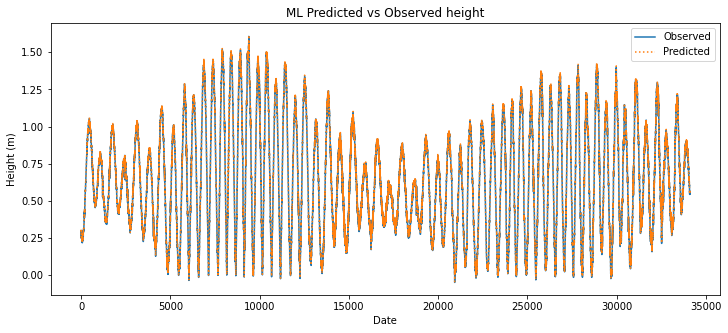

In [31]:
plt.figure(figsize=(12,5))
plt.plot(np.arange(0,34100),dg2,label='Observed')
plt.plot(np.arange(0,34100),reg.predict(dg1),label='Predicted',linestyle='dotted')
plt.xlabel('Date')
plt.ylabel('Height (m)')
plt.title('ML Predicted vs Observed height')
plt.legend()

In [32]:
from sklearn.metrics import mean_squared_error
print('RMSE: ',np.sqrt(mean_squared_error(dg2,reg.predict(dg1))))

RMSE:  0.0058544745300415655
